In [3]:
# import packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# read in data
df = pd.read_csv('cleaned_data/NormalizedCountsMetadata.csv')

In [15]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,SampleID,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000284735,ENSG00000284737,ENSG00000284738,ENSG00000284740,ENSG00000284743,ENSG00000284747,ENSG00000284748,SampleTiming,FrailtyStatus,Age
0,0029-0,7.0,31.0,7.0,385.0,3.0,12.0,30.0,39.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,pre-vaccination,frail,73.6
1,0029-3,7.0,37.0,10.0,400.0,3.0,15.0,34.0,46.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3 days post-vaccination,frail,73.6
2,0029-7,5.0,28.0,9.0,485.0,3.0,13.0,31.0,39.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7 days post-vaccination,frail,73.6
3,0104-0,11.0,47.0,10.0,320.0,4.0,14.0,30.0,63.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,pre-vaccination,non-frail,62.2
4,0104-3,9.0,36.0,10.0,203.0,3.0,13.0,47.0,56.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3 days post-vaccination,non-frail,62.2


In [17]:
meta = df[[
    'SampleID',
    'SampleTiming',
    'FrailtyStatus',
    'Age'
]]
meta.head()

,SampleID,SampleTiming,FrailtyStatus,Age
0,0029-0,pre-vaccination,frail,73.6
1,0029-3,3 days post-vaccination,frail,73.6
2,0029-7,7 days post-vaccination,frail,73.6
3,0104-0,pre-vaccination,non-frail,62.2
4,0104-3,3 days post-vaccination,non-frail,62.2


In [18]:
# Split the merged df into genes and metadata
# Y = meta no need to reassign
features = df.loc[:, 'ENSG00000000419':'ENSG00000284748']
features.head()

,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSG00000284730,ENSG00000284731,ENSG00000284734,ENSG00000284735,ENSG00000284737,ENSG00000284738,ENSG00000284740,ENSG00000284743,ENSG00000284747,ENSG00000284748
0,7.0,31.0,7.0,385.0,3.0,12.0,30.0,39.0,3.0,52.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,7.0,37.0,10.0,400.0,3.0,15.0,34.0,46.0,2.0,47.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5.0,28.0,9.0,485.0,3.0,13.0,31.0,39.0,2.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,11.0,47.0,10.0,320.0,4.0,14.0,30.0,63.0,3.0,91.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,9.0,36.0,10.0,203.0,3.0,13.0,47.0,56.0,3.0,80.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# begin preprocessing the counts data
# scale the data so that the mean is 0 and the std is 1
scaled_data = preprocessing.scale(features)

# Call the PCA method to an object and fit the data
pca = PCA(n_components=4)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Calculate the percentage variation that each pc accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

Text(0.5, 1.0, 'Scree Plot')

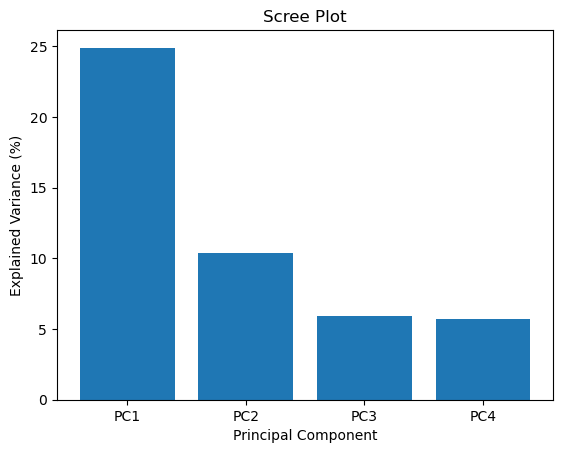

In [20]:
# Create labels for the scree plot
labels = ['PC1', 'PC2', 'PC3', 'PC4']

# Generate Scree plot
plt.bar(x = [1, 2, 3, 4], height=per_var, tick_label=['PC1', 'PC2', 'PC3', 'PC4'])
plt.ylabel('Explained Variance (%)')
plt.xlabel("Principal Component")
plt.title("Scree Plot")

In [21]:
# Create df for biplot
pca_df_scaled = pd.DataFrame(pca_data, columns=labels)
pca_df_scaled.head(2)

In [24]:
# merge the metadata back in
pca_df_scaled = pca_df_scaled.merge(meta, left_index=True, right_index=True)
pca_df_scaled.head(2)

,PC1,PC2,PC3,PC4,SampleID,SampleTiming,FrailtyStatus,Age
0,-44.436764,55.268085,-35.614296,39.948738,0029-0,pre-vaccination,frail,73.6
1,-30.282427,11.672683,-1.405418,-5.304221,0029-3,3 days post-vaccination,frail,73.6
2,-32.075674,83.939684,-26.804866,22.774659,0029-7,7 days post-vaccination,frail,73.6
3,35.805380,-40.676023,-17.371480,-36.947454,0104-0,pre-vaccination,non-frail,62.2
4,-10.058967,-51.699935,-52.738149,-41.144808,0104-3,3 days post-vaccination,non-frail,62.2


[Text(0.5, 0, 'PC1 - 24.9%'), Text(0, 0.5, 'PC2 - 10.4%')]

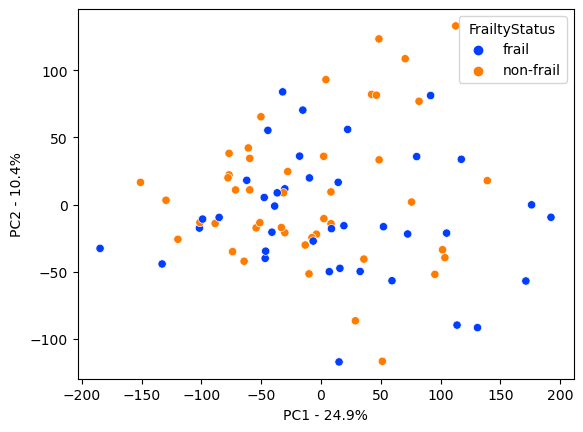

In [50]:
# use seaborn to generate biplot
# Hue for frailty status, sample timing, sampleid 

# Generate labels
x_label = f'PC1 - {per_var[0]}%'
y_label = f'PC2 - {per_var[1]}%'

#Generate fig
ax = sns.scatterplot(
    data=pca_df_scaled,
    x=pca_df_scaled.PC1,
    y=pca_df_scaled.PC2,
    hue='FrailtyStatus',
    palette='bright'
    )

ax.set(xlabel=x_label, ylabel=y_label)

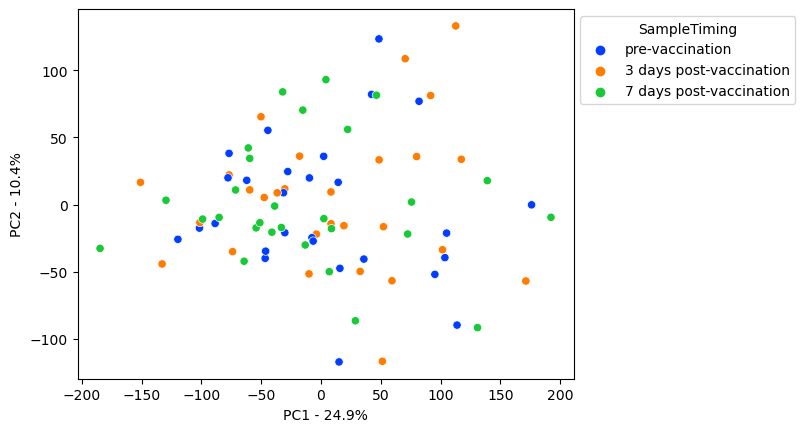

In [52]:
#Generate fig
ax = sns.scatterplot(
    data=pca_df_scaled,
    x=pca_df_scaled.PC1,
    y=pca_df_scaled.PC2,
    hue='SampleTiming',
    legend='brief',
    palette='bright'
    )

# set axis names
ax.set(xlabel=x_label, ylabel=y_label)

# Move legend
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))